<a href="https://colab.research.google.com/github/saeloman/APNEE_SOMMEIL/blob/main/TP2MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [3]:
# Charger les données MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
#Normaliser les images pour que les valeurs soient entre 0 et 1
x_train, x_test = x_train / 255.0, x_test / 255.0
# Convertir les labels en one-hot encoding
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

In [10]:
#Construire le modèle de réseau de neurones
model = Sequential([
#Aplatir les images 28x28 en un vecteur de 784 pixels
Flatten (input_shape=(28, 28)),
#Couche dense (entièrement connectée) avec 128 neurones et la for
Dense(128, activation='relu'),
# Couche de sortie avec 10 neurones (un pour chaque chiffre) et la
Dense(10, activation='softmax')
])

In [11]:
# Compiler le modèle avec l'optimiseur Adam et la fonction de perte categorical_crossentropy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#Entraîner le modèle avec les données d'entraînement
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8829 - loss: 0.4246 - val_accuracy: 0.9582 - val_loss: 0.1423
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9644 - loss: 0.1230 - val_accuracy: 0.9677 - val_loss: 0.1076
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9758 - loss: 0.0819 - val_accuracy: 0.9738 - val_loss: 0.0836
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9824 - loss: 0.0576 - val_accuracy: 0.9777 - val_loss: 0.0735
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9857 - loss: 0.0457 - val_accuracy: 0.9748 - val_loss: 0.0795


In [12]:
#Evaluer le modèle avec les données de test
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Précision du modèle: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9726 - loss: 0.0878
Précision du modèle: 97.48%


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9897 - loss: 0.0340 - val_accuracy: 0.9762 - val_loss: 0.0802
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9916 - loss: 0.0293 - val_accuracy: 0.9764 - val_loss: 0.0802
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9935 - loss: 0.0218 - val_accuracy: 0.9770 - val_loss: 0.0787
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9943 - loss: 0.0183 - val_accuracy: 0.9757 - val_loss: 0.0847
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9952 - loss: 0.0161 - val_accuracy: 0.9787 - val_loss: 0.0788
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9970 - loss: 0.0106 - val_accuracy: 0.9779 - val_loss: 0.0841
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9966 - loss: 0.0110 - val_accuracy: 0.9774 - val_loss: 0.0980
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9976 - loss: 0.008

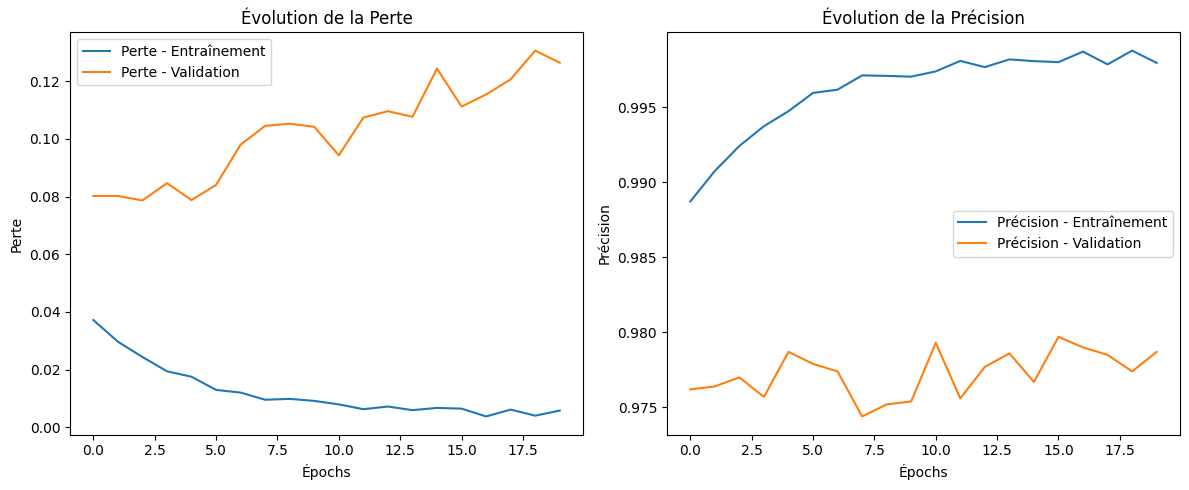

In [13]:
import matplotlib.pyplot as plt

# Entraînement du modèle avec l'historique
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Évaluation du modèle
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Précision du modèle: {accuracy * 100:.2f}%")

# Tracer la courbe de la perte (loss)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte - Entraînement')
plt.plot(history.history['val_loss'], label='Perte - Validation')
plt.title('Évolution de la Perte')
plt.xlabel('Épochs')
plt.ylabel('Perte')
plt.legend()

# Tracer la courbe de précision (accuracy)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Précision - Entraînement')
plt.plot(history.history['val_accuracy'], label='Précision - Validation')
plt.title('Évolution de la Précision')
plt.xlabel('Épochs')
plt.ylabel('Précision')
plt.legend()

# Affichage des courbes
plt.tight_layout()
plt.show()
